## step 1. 사진 모으기

file_list: ['hyesoopark.jpeg', 'sooyoung.jpeg', 'dami kim.jpeg', 'me2.jpeg', 'suzi.jpeg', 'bona.jpeg', 'goeun.jpeg', 'yezi.png', 'peng.jpeg', 'hani.jpeg', 'leehyun_cho.jpeg', 'me1.jpg', 'jina_won.jpeg', 'seulgi.jpeg', '.ipynb_checkpoints', 'hojung.png', 'cnblue.jpeg', 'joonyeul.jpeg']


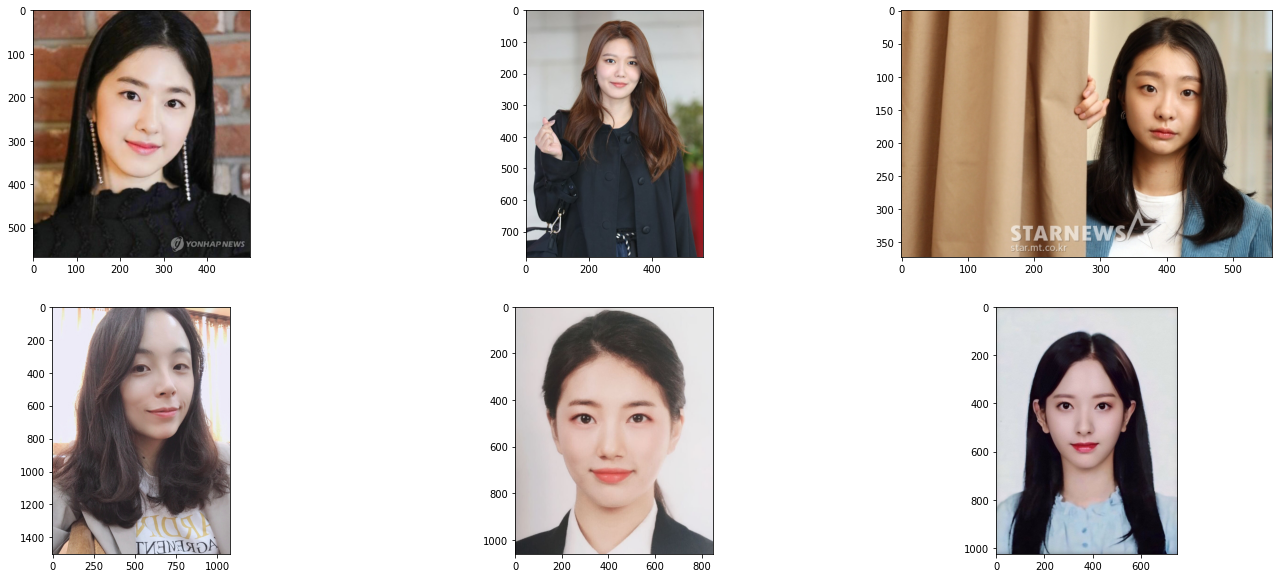

In [1]:
#데이터 준비
import os

dir_path=os.getenv('HOME')+'/aiffel/face_embedding2'
file_list=os.listdir(dir_path)

print("file_list: {}".format(file_list))

# matplotlib 통해서 이미지 출력하기
import matplotlib.pyplot as plt
import matplotlib.image as img

#그래프를 통해서 사진 출력하기
fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten 함수를 사용하여 iterating 용이하게 만들기
for i, ax in enumerate(axes.flatten()):
    image=img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

# 그래프에 맞춰서 출력
fig.tight_layout()

## Step 2. 얼굴 영역 자르기

[(233, 911, 788, 356)]


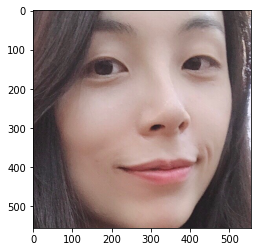

In [2]:
# 저장되어 있는 내 사진을 불러와 그래프위에 올리기
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path=os.getenv('HOME')+'/aiffel/face_embedding2/me2.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 얼굴 영역의 좌표를 이미지에 출력

# 얼굴 영역에 맞게 crop
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

In [3]:
import face_recognition
import os
import matplotlib.pyplot as plt

# 이미지에서 얼굴영역을 가져오기
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

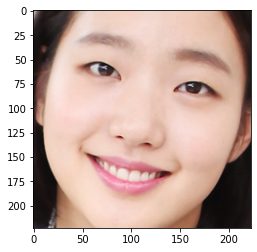

In [4]:
# 다른 사진에도 적용되는 지 확인
image_path = os.getenv('HOME')+'/aiffel/face_embedding2/goeun.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [5]:
# 폴더 안에 있는 이미지 파일 명 확인
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['hyesoopark.jpeg', 'sooyoung.jpeg', 'dami kim.jpeg', 'me2.jpeg', 'suzi.jpeg', 'bona.jpeg', 'goeun.jpeg', 'yezi.png', 'peng.jpeg', 'hani.jpeg', 'leehyun_cho.jpeg', 'me1.jpg', 'jina_won.jpeg', 'seulgi.jpeg', '.ipynb_checkpoints', 'hojung.png', 'cnblue.jpeg', 'joonyeul.jpeg']


In [6]:
image_file = os.path.join(dir_path, 'me2.jpeg')
# 얼굴 영역을 구하는 함수
face = get_cropped_face(image_file)   

# 얼굴 영역을 통해 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.02251357,  0.06041735, -0.00338852, -0.06525197, -0.11091308,
        -0.06792769, -0.07447378, -0.03773338,  0.17933132, -0.0963262 ,
         0.23124942, -0.14297011, -0.16313528,  0.00857474, -0.03436191,
         0.19144401, -0.22146386, -0.08570716, -0.01288789,  0.00940924,
         0.11371522,  0.04750097,  0.0038368 ,  0.1146672 , -0.13884553,
        -0.28817052, -0.09201025, -0.14237839,  0.0424681 , -0.1165483 ,
        -0.03779007,  0.02469175, -0.14862897, -0.06768294,  0.03824816,
         0.05254921, -0.00233388, -0.11233369,  0.18846494,  0.02172286,
        -0.34704828,  0.07552274,  0.07242497,  0.28168926,  0.15201521,
         0.00506537, -0.00948234, -0.14585178,  0.13296209, -0.18351869,
        -0.01469545,  0.14459607,  0.06133797,  0.03241597,  0.00781013,
        -0.07163469,  0.07131838,  0.11233418, -0.19462931,  0.02867911,
         0.15514445, -0.02310405,  0.07315399, -0.07892687,  0.2218859 ,
         0.03867111, -0.1259661 , -0.1854164 ,  0.0

In [7]:
# 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해 dict에 담는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담기는 조건부 생성 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            continue
            
    return embedding_dict

In [8]:
# get_face_embedding_dict 함수 이름 생성
embedding_dict = get_face_embedding_dict(dir_path)
# embedding_dict['me2']

In [13]:
# 내 사진을 통해서 얼굴 임베딩 사이즈의 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# get_distance('me1', 'me2')

## Step4. 모은 연예인들과 비교하기

In [14]:
# 나를 지정으로 get_nearest_face 함수 만들기
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('me2')

In [22]:
import numpy as np

# name1과 name2의 거리를 비교하는 함수를 생성 
# name1은 미리 지정, name2는 호출시에 인자로 받도록 만들기
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 함수 sort_key_func는 sort_key_func('me2') 라고 호출할 때 내 이미지와 다른 이미지 사이의 임베딩 벡터 거리를 계산
sort_key_func = get_sort_key_func('me2')   

In [23]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('me2',
  array([-0.02251357,  0.06041735, -0.00338852, -0.06525197, -0.11091308,
         -0.06792769, -0.07447378, -0.03773338,  0.17933132, -0.0963262 ,
          0.23124942, -0.14297011, -0.16313528,  0.00857474, -0.03436191,
          0.19144401, -0.22146386, -0.08570716, -0.01288789,  0.00940924,
          0.11371522,  0.04750097,  0.0038368 ,  0.1146672 , -0.13884553,
         -0.28817052, -0.09201025, -0.14237839,  0.0424681 , -0.1165483 ,
         -0.03779007,  0.02469175, -0.14862897, -0.06768294,  0.03824816,
          0.05254921, -0.00233388, -0.11233369,  0.18846494,  0.02172286,
         -0.34704828,  0.07552274,  0.07242497,  0.28168926,  0.15201521,
          0.00506537, -0.00948234, -0.14585178,  0.13296209, -0.18351869,
         -0.01469545,  0.14459607,  0.06133797,  0.03241597,  0.00781013,
         -0.07163469,  0.07131838,  0.11233418, -0.19462931,  0.02867911,
          0.15514445, -0.02310405,  0.07315399, -0.07892687,  0.2218859 ,
          0.03867111, -0.1259

In [24]:
# 최고 top 5까지 나올 수 있도록 함수 생성
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 내 이미지 이므로 삭제
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
# 이미지파일 'me2' 기준, 나와 가장 닮은 사람 순위
get_nearest_face('me2')

순위 1 : 이름(me1), 거리(0.45573170804965263)
순위 2 : 이름(jina_won), 거리(0.5007485191780499)
순위 3 : 이름(goeun), 거리(0.5033319060465277)
순위 4 : 이름(seulgi), 거리(0.5052945045416425)
순위 5 : 이름(suzi), 거리(0.5190230912188857)


In [41]:
# 이미지파일 'me1'으로 닮은 연예인을 찾는 함수 다시 생성
sort_key_func = get_sort_key_func('me1')   
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 내 이미지 이므로 삭제 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
get_nearest_face('me1')

순위 1 : 이름(goeun), 거리(0.396950460291814)
순위 2 : 이름(jina_won), 거리(0.417651244097339)
순위 3 : 이름(leehyun_cho), 거리(0.4268371983446067)
순위 4 : 이름(hyesoopark), 거리(0.42879774874178905)
순위 5 : 이름(hani), 거리(0.43322357510928394)


## Step5. 다양한 재미있는 시각화 시도해 보기

In [44]:
# 두개의 이미지 파일 top 10 불러오기
print('"Me1" 이미지의 top 10')
sort_key_func = get_sort_key_func('me1')   
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 내 이미지 이므로 삭제 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
get_nearest_face('me1')

print('', sep='\n')
print('"Me2" 이미지의 top 10', sep='2')
sort_key_func = get_sort_key_func('me2')   
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 내 이미지 이므로 삭제 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
get_nearest_face('me2')

"Me1" 이미지의 top 10
순위 1 : 이름(goeun), 거리(0.396950460291814)
순위 2 : 이름(jina_won), 거리(0.417651244097339)
순위 3 : 이름(leehyun_cho), 거리(0.4268371983446067)
순위 4 : 이름(hyesoopark), 거리(0.42879774874178905)
순위 5 : 이름(hani), 거리(0.43322357510928394)
순위 6 : 이름(suzi), 거리(0.43788848041646944)
순위 7 : 이름(bona), 거리(0.44387688424458444)
순위 8 : 이름(me2), 거리(0.45573170804965263)
순위 9 : 이름(hojung), 거리(0.4664402567859538)
순위 10 : 이름(seulgi), 거리(0.47368903540159957)

"Me2" 이미지의 top 10
순위 1 : 이름(me1), 거리(0.45573170804965263)
순위 2 : 이름(jina_won), 거리(0.5007485191780499)
순위 3 : 이름(goeun), 거리(0.5033319060465277)
순위 4 : 이름(seulgi), 거리(0.5052945045416425)
순위 5 : 이름(suzi), 거리(0.5190230912188857)
순위 6 : 이름(leehyun_cho), 거리(0.5284220157622556)
순위 7 : 이름(cnblue), 거리(0.5298366910079876)
순위 8 : 이름(bona), 거리(0.5457715709514828)
순위 9 : 이름(hyesoopark), 거리(0.5478591796205483)
순위 10 : 이름(dami kim), 거리(0.5599993039402138)


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

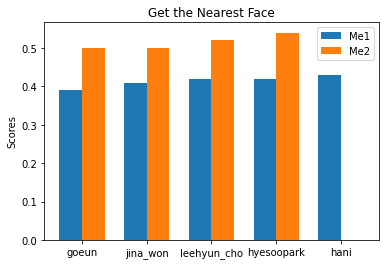

In [45]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['goeun', 'jina_won', 'leehyun_cho', 'hyesoopark', 'hani']
me1_score = [0.39, 0.41, 0.42, 0.42, 0.43]
me2_score = [0.50, 0.50, 0.52, 0.54, 0]

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, me1_score, width, label='Me1')
rects2 = ax.bar(x + width/2, me2_score, width, label='Me2')


ax.set_ylabel('Scores')
ax.set_title('Get the Nearest Face')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()